# 과제1. car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 0.환경설정

* 필요한 라이브러리 로딩, 데이터셋 가져오기

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst                              # 가설검정 도구 가져오기

### 2) 데이터 불러오기

In [196]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
# data = pd.read_csv('carseats.csv')
data.drop(['CompPrice','Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes
3,7.40,4,466,97,Medium,55,Yes
4,4.15,3,340,128,Bad,38,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(Good, Medium, Bad)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes, No)	|	feature	|


## 1.가설수립

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) Sales

In [7]:
target = 'Sales'

1) 변수의 비즈니스 의미

> * 각 지역의 판매액 (단위 : 1000달러)  
> * Y(Target)  
> * 다른 데이터를 통해 분석해야할 대상  
ex) 지역 인구수에 따른 각 지역 판매액

2) 숫자, 범주?

> Sales --> 숫자

3) NaN 존재 유무

In [199]:
data.isna().sum()

Sales          0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
US             0
dtype: int64

4) 기초통계량(수치화)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   Advertising  400 non-null    int64  
 2   Population   400 non-null    int64  
 3   Price        400 non-null    int64  
 4   ShelveLoc    400 non-null    object 
 5   Age          400 non-null    int64  
 6   US           400 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 22.0+ KB


In [10]:
data.describe()

,Sales,Advertising,Population,Price,Age
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,6.635000,264.840000,115.795000,53.322500
std,2.824115,6.650364,147.376436,23.676664,16.200297
min,0.000000,0.000000,10.000000,24.000000,25.000000
25%,5.390000,0.000000,139.000000,100.000000,39.750000
50%,7.490000,5.000000,272.000000,117.000000,54.500000
75%,9.320000,12.000000,398.500000,131.000000,66.000000
max,16.270000,29.000000,509.000000,191.000000,80.000000


5) 분포 확인(시각화)

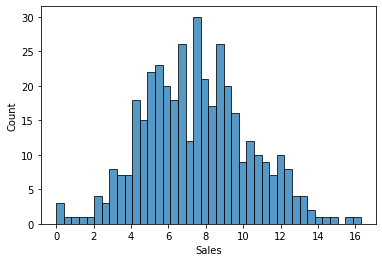

In [12]:
sns.histplot(data[target], bins = 40)
plt.show()

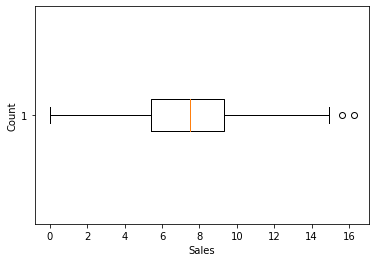

[5.39 0.  ]
[ 9.32 14.9 ]


In [202]:
box = plt.boxplot(data[target], vert = False)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

print(box['whiskers'][0].get_xdata())

print(box['whiskers'][1].get_xdata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 총 매출액이 높은 지역과 낮은 지역의 차이점을 분석하여 매장에서 수정할 수 있는 요소라면 개선사항으로 검토할 수 있다.

> * 광고비와 매출액의 상관관계를 분석하여 광고액이 매출액에 미치는 영향을 분석하여 유의미한 영향이 있다면 매출액이 낮은 지역에 광고비를 높여 매출액 향상을 위한 방침 검토할 수 있다.


> * 지역 인구수와 매출액의 상관관계를 이용하여 분석하고 유의미한 영향이 있다면 회사 혹은 매장의 위치에 대해 검토할 수 있다.
> * 제품 당 가격과 매출액의 상관관계를 이용하여 분석하고 유의미한 영향이 있다면 제품 당 가격의 변동 검토할 수 있다.

7) 추가 분석해 볼 사항이 있나요?

> * 평균 나이뿐 아니라 자녀의 유무 또한 조사하여 해당 연령대에 자녀가 있는지 있다면 그 자녀의 연령대를 분석하여 car seat의 필요성을 분석해 본다. 
> * (판매액*1000)/판매금액 = 판매량 컬럼을 추가해서 재고와 판매가격을 조정할 수 있는 지표가 될 수 있다.

### 2) Advertising

In [40]:
feature = 'Advertising'

1) 변수의 비즈니스 의미

> * 해당 제품을 광고하는데 쓰인 비용  
> * 광고비가 높을 때 판매액 / 판매량이 높다면 광고비가 판매에 미치는 영향이 유의미 하다고 판단할 수 있을 것이다.

2) 숫자, 범주?

> * 숫자 데이터

3) NaN 존재 유무

In [41]:
data[feature].isna().sum()

0

4) 기초통계량(수치화)

In [42]:
data[feature].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

5) 분포 확인(시각화)

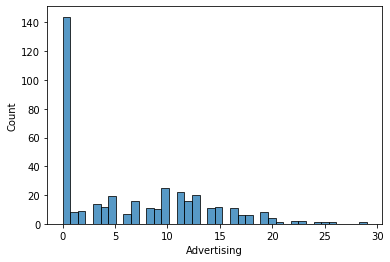

In [43]:
sns.histplot(data[feature], bins = 40)
plt.show()

In [44]:
# 광고비에 투자하지 않는 지역/회사/매장 수
data.loc[data[feature]==0].count()

Sales          144
Advertising    144
Population     144
Price          144
ShelveLoc      144
Age            144
US             144
dtype: int64

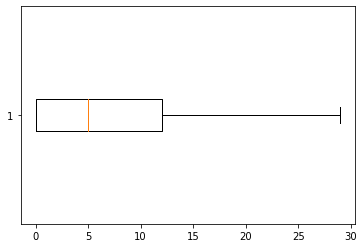

[0. 0.]
[12. 29.]


In [45]:
box = plt.boxplot(data[feature], vert = False)
plt.show()

print(box['whiskers'][0].get_xdata())
print(box['whiskers'][1].get_xdata())

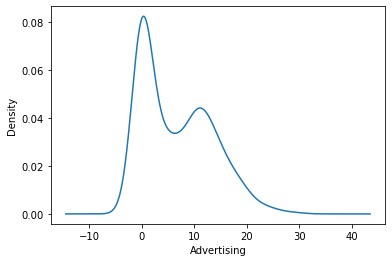

In [203]:
pd.Series(feature)
data[feature].plot(kind = 'kde') 
plt.xlabel('Advertising')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 광고비 지출을 5000달러 이하로 하는 회사 혹은 매장의 비율이 절반이 넘어가는 것으로 보아 대부분의 회사들이 광고에 크게 투자하지 않는것으로 판단된다.
> * 광고비 지출을 하지 않는 회사 혹은 매장이 144개이다.

7) 추가 분석해 볼 사항이 있나요?

> * 광고비 지출을 크게 하는 지역의 판매량과 이변량 분석하여 광고비와 지출의 영향력 판단

#이변량 분석에서 해보자

In [47]:
# 상관계수와 p-value
tmp = spst.pearsonr(data[feature], data[target])
print("상관계수 : ", tmp[0])
print("p-value : ", tmp[1])
# p-value값이 0에 가까울 수록 직선으로 설명이 잘되는지 / 직선에 모여있는지 볼 수 있음

상관계수 :  0.269506781376902
p-value :  4.377677110302732e-08


> * 상관계수
> * p-value 

### 3) Population

In [205]:
feature = 'Population'

1) 변수의 비즈니스 의미

> * 지역 인구수(단위 : 1000명)

2) 숫자, 범주?

> * 숫자 데이터

3) NaN 존재 유무

In [49]:
data[feature].isna().sum()

0

4) 기초통계량(수치화)

In [50]:
data[feature].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

5) 분포 확인(시각화)

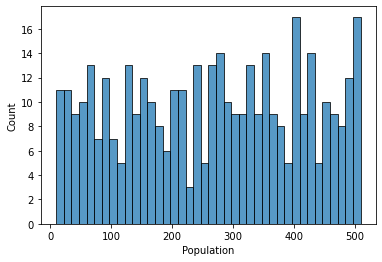

In [51]:
sns.histplot(data[feature], bins = 40)
plt.show()

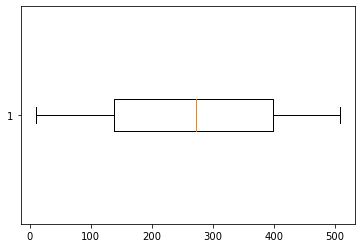

[139.  10.]
[398.5 509. ]


In [52]:
box = plt.boxplot(data[feature], vert = False)
plt.show()

print(box['whiskers'][0].get_xdata())
print(box['whiskers'][1].get_xdata())

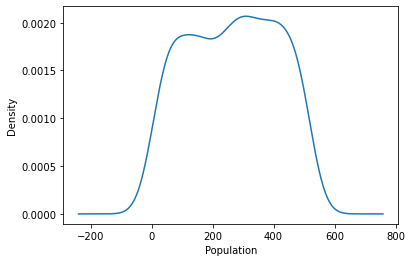

In [206]:
pd.Series(feature)
data[feature].plot(kind = 'kde') 
plt.xlabel('Population')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 분포가 중앙에 넓게 모여있음

7) 추가 분석해 볼 사항이 있나요?

> * 지역 인구수에 따라 판매액에 영향을 미치는지 분석할 필요 있음

### 4) Price

In [75]:
feature = 'Price'

1) 변수의 비즈니스 의미

> *자사 지역별 판매가격(달러)	

2) 숫자, 범주?

> * 숫자 데이터

3) NaN 존재 유무

In [76]:
data[feature].isna().sum()

0

4) 기초통계량(수치화)

In [77]:
data[feature].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

5) 분포 확인(시각화)

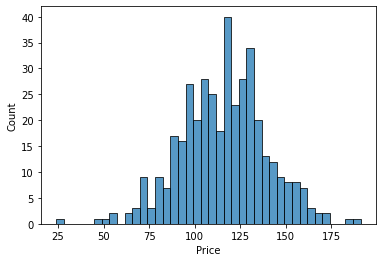

In [78]:
sns.histplot(data[feature], bins = 40)
plt.show()

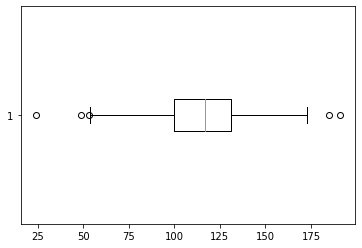

[100.  54.]
[131. 173.]


In [79]:
box = plt.boxplot(data[feature], vert = False)
plt.show()

print(box['whiskers'][0].get_xdata())
print(box['whiskers'][1].get_xdata())

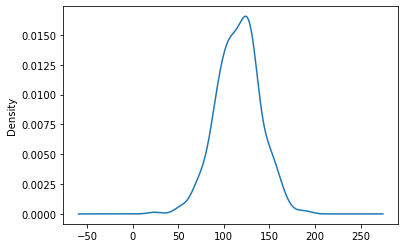

In [81]:
pd.Series(feature)
data[feature].plot(kind = 'kde') 
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 제품가격의 최대값과 최소값의 차이가 약 170달러 정도이다.
> * 다른 요소들의 비해 가장 정규분포표와 비슷하다.

7) 추가 분석해 볼 사항이 있나요?

> * 지역별 판매가격이 낮은 지역에서의 판매량 높은지역에서의 판매량을 분석해서 판매가격과 판매량의 상관관계를 분석 필요

### 5) ShelveLoc

In [207]:
feature = 'ShelveLoc'

1) 변수의 비즈니스 의미

> * 매장 내 제품의 진열상태(Good, Medium, Bad)

2) 숫자, 범주?

> * 범주 데이터

In [208]:
data[feature].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

3) NaN 존재 유무

In [209]:
data[feature].isna().sum()

0

4) 기초통계량(수치화)

In [210]:
print(data[feature].describe())
print('-'*50)
print(data[feature].value_counts())
print('-'*50)
print(data[feature].value_counts()/ len(data[feature]))

count        400
unique         3
top       Medium
freq         219
Name: ShelveLoc, dtype: object
--------------------------------------------------
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
--------------------------------------------------
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


5) 분포 확인(시각화)

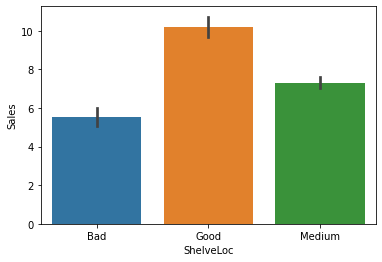

In [211]:
sns.barplot(x = feature, y = target, data = data)
plt.show()

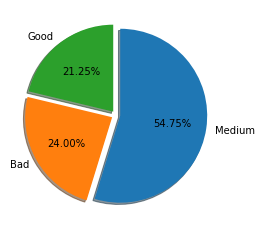

In [212]:
tmp = pd.Series(data[feature])
cnt = data[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       startangle=90, counterclock = False,
       explode = [0.05, 0.05, 0.05], shadow = True)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 76%의 매장에서 진열상태가 양호한 편으로 분석되고 그 외 24%의 매장에서는 진열상태가 '나쁨'으로 분석된다.
> * 진열상태가 '좋음'으로 분석되는 매장이 '나쁨'으로 분석되는 매장보다 적게 나옴
> * 본사 차원에서 매장관리에 조금 더 신경을 써야 할 것이다.

7) 추가 분석해 볼 사항이 있나요?

> * 이변량 분석을 통해 진열상태와 판매량 / 판매액에 상관관계 분석 필요

### 6) [추가]Age

In [164]:
feature = 'Age'

1) 변수의 비즈니스 의미

> * 지역 인구의 평균 연령	

2) 숫자, 범주?

> * 숫자 데이터

3) NaN 존재 유무

In [165]:
data[feature].isna().sum()

0

4) 기초통계량(수치화)

In [166]:
data[feature].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

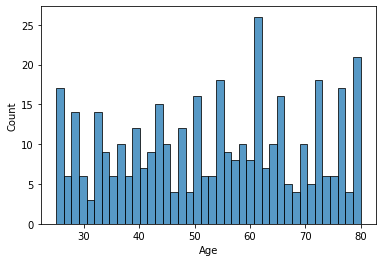

In [169]:
sns.histplot(data[feature], bins = 40)
plt.show()

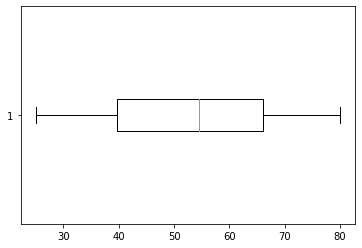

[39.75 25.  ]
[66. 80.]


In [170]:
box = plt.boxplot(data[feature], vert = False)
plt.show()

print(box['whiskers'][0].get_xdata())
print(box['whiskers'][1].get_xdata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 지역 내 연령분포가 특정 연령층으로 치우지지 않은 고르게 분포된 것으로 볼 수 있다.

7) 추가 분석해 볼 사항이 있나요?

> * 연령별 자녀유무 혹은 그 자녀의 연령대 또한 조사해 볼 필요가 있다.

### 7) [추가]US

In [171]:
feature = 'US'

1) 변수의 비즈니스 의미

> * 매장이 미국에 있는지 여부(Yes, No)

2) 숫자, 범주?

> * 범주 데이터

3) NaN 존재 유무

In [177]:
data[feature].isna().sum()

0

4) 기초통계량(수치화)

In [178]:
print(data[feature].describe())
print('-'*50)
print(data[feature].value_counts())
print('-'*50)
print(data[feature].value_counts()/ len(data[feature]))

count     400
unique      2
top       Yes
freq      258
Name: US, dtype: object
--------------------------------------------------
Yes    258
No     142
Name: US, dtype: int64
--------------------------------------------------
Yes    0.645
No     0.355
Name: US, dtype: float64


5) 분포 확인(시각화)

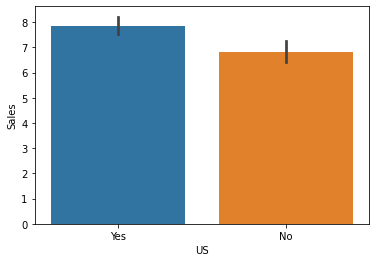

In [180]:
sns.barplot(x = feature, y = target, data = data) #plt의 barplot 사용해서
plt.show()

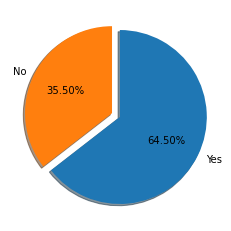

In [176]:
tmp = pd.Series(data[feature])
cnt = data[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',
       startangle=90, counterclock = False,
       explode = [0.05, 0.05], shadow = True)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 64.5% 가량의 매장이 미국지역에 존재한다

7) 추가 분석해 볼 사항이 있나요?

> * 미국에 있는 매장과, 없는 매장과의 차이점을 비교 분석해본다.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [88]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### 1) Advertising -> Sales

① 시각화 : scatter(regplot), jointplot

In [189]:
feature = 'Advertising'

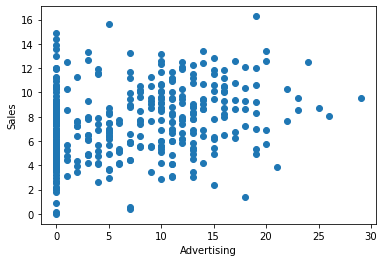

In [190]:
# 시각화 : scatter (matplotlib.pyplot)
plt.scatter(feature, target, data = data)
plt.xlabel(feature)
plt.ylabel(target)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


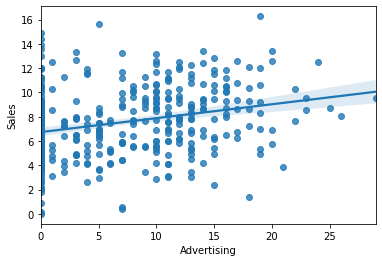

In [191]:
sns.regplot(feature, target, data = data)
plt.xlabel(feature)
plt.ylabel(target)
plt.show()

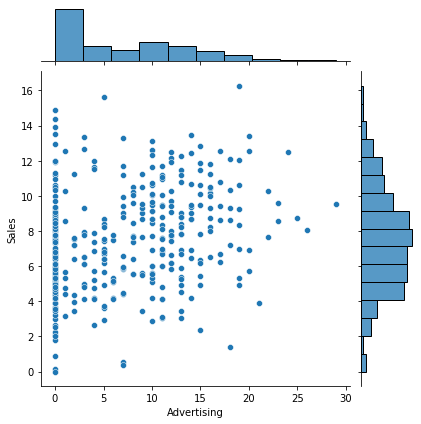

In [192]:
# 시각화 : jointplot (seaborn)
sns.jointplot(x = feature, y = target, data = data)
plt.show()

② 수치화 : 상관분석

In [193]:
data.isna().sum()

Sales          0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
US             0
dtype: int64

In [194]:
# 상관계수와 p-value
tmp = spst.pearsonr(data[feature], data[target])
print("상관계수 : ", tmp[0])
print("p-value : ", tmp[1])
# p-value값이 0에 가까울 수록 직선으로 설명이 잘되는지 / 직선에 모여있는지 볼 수 있음

상관계수 :  0.269506781376902
p-value :  4.377677110302732e-08


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> * p-value 값은 실제로 상관관계가 존재하지 않는데 상관관계가 존재한다는 결론을 내릴 위험 정도를 나타내는 값이다.
> * 즉, p-value값이 클 수록 두 요소간 상관관계가 존재한다고 보기 어렵다.
> * 일반적으로 유의수준을 0.05로 둔다.

> * 
> * 상관계수의 절대값이 0.2< |상관계수| <=0.5 인것 으로 보아 중간정도의 상관관계로 볼 수 있다.
> * p-value 값이 일반적인 유의수준인 0.05보다 작으므로 두 변수간의 상관관계가 유의미하다고 볼 수 있다.

#### 2) Population -> Sales

In [146]:
feature = 'Population'

① 시각화 : scatter(regplot), jointplot

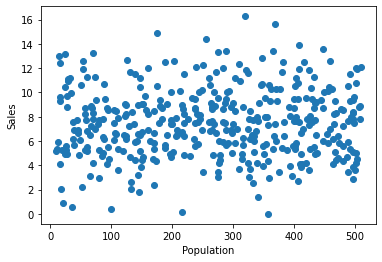

In [147]:
# 시각화 : scatter (matplotlib.pyplot)
plt.scatter(feature, target, data = data)
plt.xlabel(feature)
plt.ylabel(target)
plt.show()

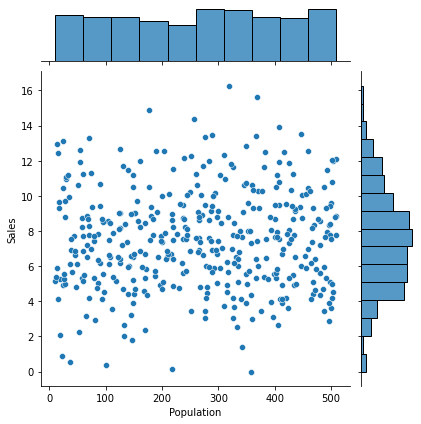

In [149]:
# 시각화 : jointplot (seaborn)
sns.jointplot(x = feature, y = target, data = data)
plt.show()

② 수치화 : 상관분석

In [100]:
# 상관계수와 p-value
tmp = spst.pearsonr(data[feature], data[target])
print("상관계수 : ", tmp[0])
print("p-value : ", tmp[1])
# p-value값이 0에 가까울 수록 직선으로 설명이 잘되는지 / 직선에 모여있는지 볼 수 있음

상관계수 :  0.0504709844720392
p-value :  0.31398160931903


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> * 상관계수의 절대값이 다른 요소들에 비해 작은것으로 보아 선형관계로 볼 수 없다.
> * p-value 값이 일반적인 유의수준인 0.05보다 크므로 인구와 판매량에는 상관관계가 있다고 보기 어렵다.

#### 3) Price -> Sales

In [101]:
feature = 'Price'

① 시각화 : scatter(regplot), jointplot

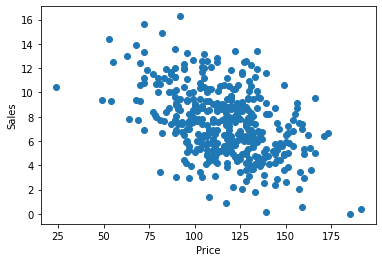

In [102]:
# 시각화 : scatter (matplotlib.pyplot)
plt.scatter(feature, target, data = data)
plt.xlabel(feature)
plt.ylabel(target)
plt.show()

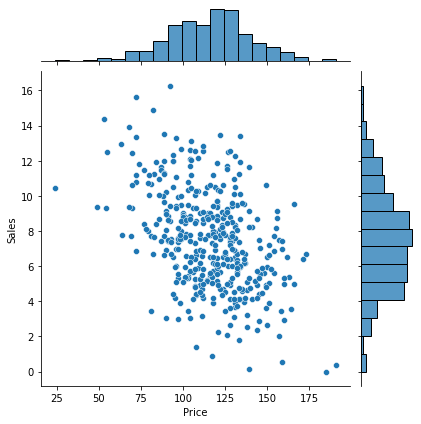

In [103]:
# 시각화 : jointplot (seaborn)
sns.jointplot(x = feature, y = target, data = data)
plt.show()

② 수치화 : 상관분석

In [104]:
# 상관계수와 p-value
tmp = spst.pearsonr(data[feature], data[target])
print("상관계수 : ", tmp[0])
print("p-value : ", tmp[1])
# p-value값이 0에 가까울 수록 직선으로 설명이 잘되는지 / 직선에 모여있는지 볼 수 있음

상관계수 :  -0.4449507278465726
p-value :  7.61818701191294e-21


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> * 상관계수의 절대값이 |상관계수|=0.445 인것 으로 보아 강한 상관관계로 볼 수 있다. 하지만 다른 요소들에 비해서는 큰 값이다.
> * p-value 값이 0.05보다 많이 작으므로 두 변수간의 상관관계가 유의미하다고 볼 수 있다.

#### 4) [추가] Age -> Sales

In [122]:
feature = 'Age'

① 시각화 : scatter(regplot), jointplot

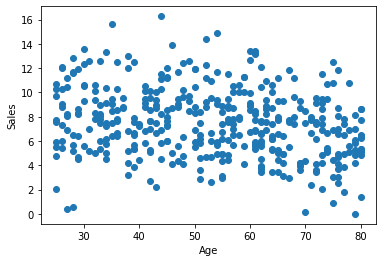

In [123]:
# 시각화 : scatter (matplotlib.pyplot)
plt.scatter(feature, target, data = data)
plt.xlabel(feature)
plt.ylabel(target)
plt.show()

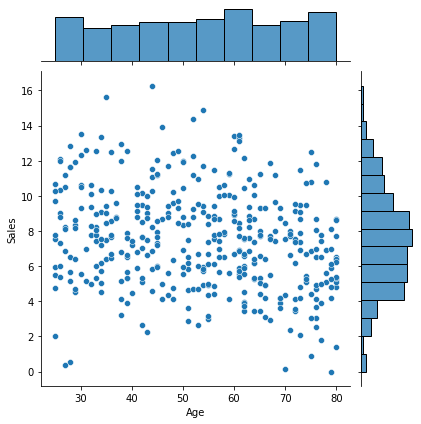

In [124]:
# 시각화 : jointplot (seaborn)
sns.jointplot(x = feature, y = target, data = data)
plt.show()

② 수치화 : 상관분석

In [125]:
# 상관계수와 p-value
tmp = spst.pearsonr(data[feature], data[target])
print("상관계수 : ", tmp[0])
print("p-value : ", tmp[1])
# p-value값이 0에 가까울 수록 직선으로 설명이 잘되는지 / 직선에 모여있는지 볼 수 있음

상관계수 :  -0.2318154396045765
p-value :  2.7889498393711916e-06


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> * 상관계수의 절대값이 |상관계수|=0.231 인것 으로 보아 상관관계가 크다고 볼 수 없다.
> * p-value 값이 0.05보다 작으므로 두 변수간의 상관관계가 유의미하다고 볼 수 있다.

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### 1) ShelveLoc-> Sales

In [105]:
feature = 'ShelveLoc'

① 시각화 : 평균비교 barplot

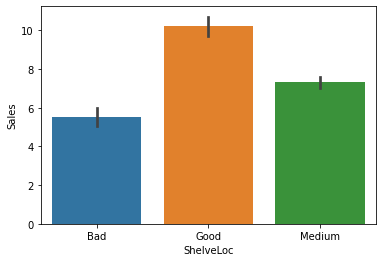

In [106]:
# barplot으로 두 범주의 평균 비교 / 검정색 세로 선은 신뢰구간
sns.barplot(x = feature, y = target, data = data)
plt.show()
# 신뢰구간이 긴 이유 ==> 편차가 크거나, 데이터가 적거나

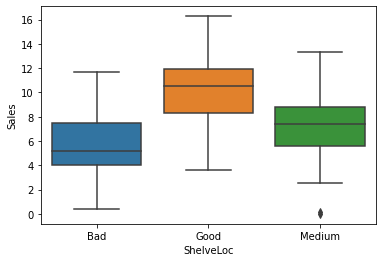

In [107]:
# boxplot으로 비교
sns.boxplot(x = feature, y = target, data = data)
plt.show()

② 수치화 : t-test, anova

In [116]:
tmp = data.loc[data[target].notnull()]

bad= tmp.loc[tmp[feature] == 'Bad', target]
good = tmp.loc[tmp[feature] == 'Good', target]
medium = tmp.loc[tmp[feature] == 'Medium', target]

In [117]:
spst.f_oneway(bad, good, medium)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> * p-value 값이 0.05보다 작으므로 두 변수간의 상관관계가 유의미하다고 볼 수 있다.

#### 2) [추가]US-> Sales

In [139]:
feature = 'US'

① 시각화 : 평균비교 barplot

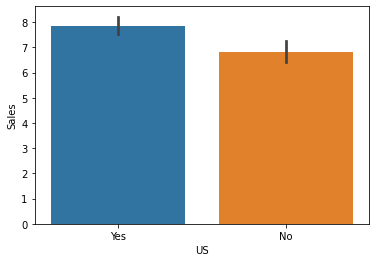

In [140]:
# barplot으로 두 범주의 평균 비교 / 검정색 세로 선은 신뢰구간
sns.barplot(x = feature, y = target, data = data)
plt.show()

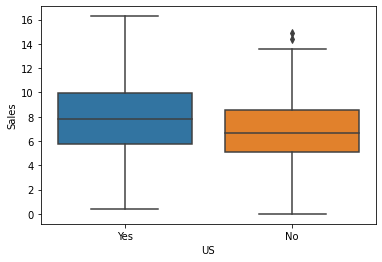

In [141]:
# boxplot으로 비교
sns.boxplot(x = feature, y = target, data = data)
plt.show()

② 수치화 : t-test, anova

In [144]:
# 먼저 범주별로 데이터를 나눕시다.
y = data.loc[data[feature]=='Yes',target]
n = data.loc[data[feature]=='No',target]

In [145]:
# t-test를 수행
spst.ttest_ind(y,n)
# pvalue가 0에 가까울수록

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> * p-value 값이 0.05보다 작으므로 두 변수간의 상관관계가 유의미하다고 볼 수 있다.

## 4.관계 정리

### 1) 강한관계의 변수

Price (|상관계수|=0.44), ShelveLoc

### 2) 약한관계의 변수

Advertising (|상관계수|=0.27),  Age (|상관계수|=0.23), US

### 3) 관계 없음

Population(|상관계수|=0.05)

### 4) 추가 분석

범주형 데이터인 ShelveLoc, US의 상관관계를 통계량의 크기로 판단하기 어렵기에 p-value로 판단해보면  
ShelveLoc의 p-value가 다른 요소들에 비해 확실히 작고 US의 p-value는 다른 요소들에 비해서 큰 값이다.  
하지만 일반적으로 유의수준을 0.05로 두고 판단하기 때문에 일반적인 유의수준보다는 작은 값으로 대립가설을 뒷받침해줄 수 있다.